### kNN classifier Assignment

## 1.Business Understanding

The goal of this assignment is to train a binary classifier for predicting the cancer diagnosis (malignant / benign) as well as testing the performance of the classifier. The model will be trained and tested using the Breast Cancer Wisconsin Diagnostic dataset from UCI Machine Learning Repository. The expected outcome is an kNN classifier model which can assist in the diagnosis of breast cancer from the features calculated from the images of fine needle aspirates (FNAs) of breast masses.

## 2.Data Preparation

The dataset is fetched from UCI Machine Learning Repository using ucimlrepo package ( https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic).
The dataset contains variables with numeric suffixes (1, 2, and 3), each representing a different dimension. All of these variables are of type float, while Diagnosis is the only variable with an object data type (B, M).

In [14]:
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import pandas as pd


breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)


X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets



In [15]:
df = pd.concat([X, y], axis=1)
df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


## 3.Data Preparation

The dataset is ready to use for modeling and does not require cleaning or fixing missing values. There should not be any outliers in the data as the features are calculated from images and represent physical characteristics of the tumors.
First, 'Diagnosis' column is dropped from the dataset leaving only numeric values to train on. 'y' corresponds to 'Diagnosis' which we want to predict. After that, data is being standardized and the model is being built. The standardization is done by using StandardScaler from sklearn. Preprocessing module.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(columns = 'Diagnosis')
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

## 4.Modeling


- The data were split into training and testing sets with a 70/30 ratio using train_test_split and random_state=123 for reproducibility.
- A KNeighborsClassifier with n_neighbors=3 was trained as the primary model.
- Model performance on the test set was evaluated using accuracy, and several k values were compared to assess the stability of the results.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=3)

# Train the kNN classifier on the training data
knn.fit(X_train, y_train)

# Use the trained classifier to predict labels for the test set
y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

Accuracy of kNN classifier on the test set: 0.98


To evaluate the performance of the model, several k-values are tested. The accuracy score for each k-value is printed to evaluate which k-value provides the best performance. The accuracy score is calculated using the score method of the KNeighborsClassifier class.

In [18]:
for k in [1, 3, 5, 7, 9, 15]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}, accuracy = {acc:.3f}")

k = 1, accuracy = 0.959
k = 3, accuracy = 0.982
k = 5, accuracy = 0.977
k = 7, accuracy = 0.971
k = 9, accuracy = 0.982
k = 15, accuracy = 0.982


The results are the same for k = 3, 9, and 15.

## 5.Evaluation
Creating confusion matrix and evaluating the resultsModel evaluation focuses on both overall accuracy and class-specific performance for the clinically important malignant class.



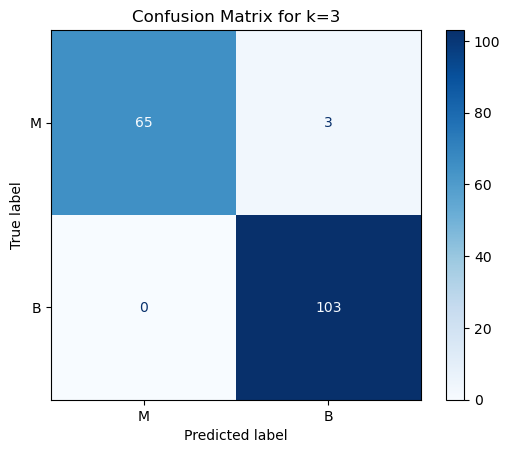

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


y_pred_test = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test, labels=['M', 'B'])
cmd = ConfusionMatrixDisplay(cm, display_labels=['M','B'])
cmd.plot(values_format='d', cmap='Blues')
plt.title('Confusion Matrix for k=3')
plt.show()


From this, we can determine metric parameters for binary classification.

In [20]:
TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

accuracy = (TP+TN)/(TP+FP+FN+TN)
precision = TP/(TP+FP)
recall = TP / (TP + FN)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accurcay: 0.98
Precision: 1.00
Recall: 0.96


The confusion matrix shows 2 benign tumors were misclassified as malignant and 0 malignant tumors were misclassified as benign, with 65 correctly classified malignant cases and 103 correctly classified benign cases. The overall accuracy is about 0.99. Precision for malignant cases is ~0.97 and for benign cases is 1.00. Recall for malignant cases is 1.00 and for benign cases is ~0.98. High recall for malignant cases means no malignant tumors were missed (FN = 0), which is clinically important; the tradeoff is a small number of false positives (2 benign -> malignant), but precision for malignant remains high. Overall the model performs well on these test data, though further validation on new data is recommended before deployment.

## 6.Deployment

This model performs well on the current test data but requires further work before clinical use.
Before deployment, the model must undergo regulatory approval and independent clinical validation according to applicable medical standards. Its performance should also be tested on external and prospective datasets to make sure the results are stable and reliable in real-world conditions.

The model should be used only as a decision support tool, helping clinicians rather than replacing medical diagnosis. Its outputs must include not only the predicted class but also probabilities, along with clear documentation of limitations and possible failure cases.

For real-world use, the system needs to be safely integrated into clinical workflows with proper data security, access control, and logging. After deployment, continuous monitoring is required to detect performance degradation, trigger retraining if needed, and maintain a full audit trail. Overall, deployment is appropriate only after regulatory approval, clinical validation, and the implementation of monitoring and data-protection measures.